In [1]:
import sys

sys.path.append("..")

from config import erp_pkls
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [2]:
# fmt:off
picks_fr = ["Fpz", "Fp1", "Fp2", "AF7", "AF3", "AF4", "AF8"]
picks_r = ["FT8", "T8", "TP8", "FC6", "C6", "CP6"]
picks_l = ["FT7", "T7", "TP7", "FC5", "C5", "CP5"]
picks_b = ["Oz", "POz", "PO8", "PO3", "O1", "O9", "O2", "O10", "PO7"]
# fmt:on
def or_(picks):
    return "|".join(picks)

In [3]:
def mean_amps(part_ids, condition, center, picks=None):
    amps = []
    for part_id in part_ids:
        df = pd.read_pickle(erp_pkls(part_id, condition, center))
        if picks is not None:
            df = df[df["ch_names"].str.match(or_(picks))]
        amps.append(df["amplitudes"].mean(axis=0))
    return amps

In [4]:
def plot_vi(picks, center, name):
    part_m_ids = ["m01", "m02", "m03", "m04", "m05", "m06"]
    part_nm_ids = ["nm01", "nm02", "nm03", "nm04"]

    amps_m = {
        "musician, move": mean_amps(part_m_ids, "move", center, picks),
        "musican, don't move": mean_amps(part_m_ids, "no_move", center, picks),
    }
    df_m = pd.DataFrame(amps_m)
    df_m = df_m.melt()

    amps_nm = {
        "non-musician, move": mean_amps(part_nm_ids, "move", center, picks),
        "non-musician, don't move": mean_amps(part_nm_ids, "no_move", center, picks),
    }
    df_nm = pd.DataFrame(amps_nm)
    df_nm = df_nm.melt()

    df = pd.concat([df_m, df_nm])
    df = df.rename(columns={"variable": "condition", "value": "amplitude"})

    plt.title(name)
    sns.violinplot(x="condition", y="amplitude", data=df, color="gray")
    plt.xticks(rotation=15)

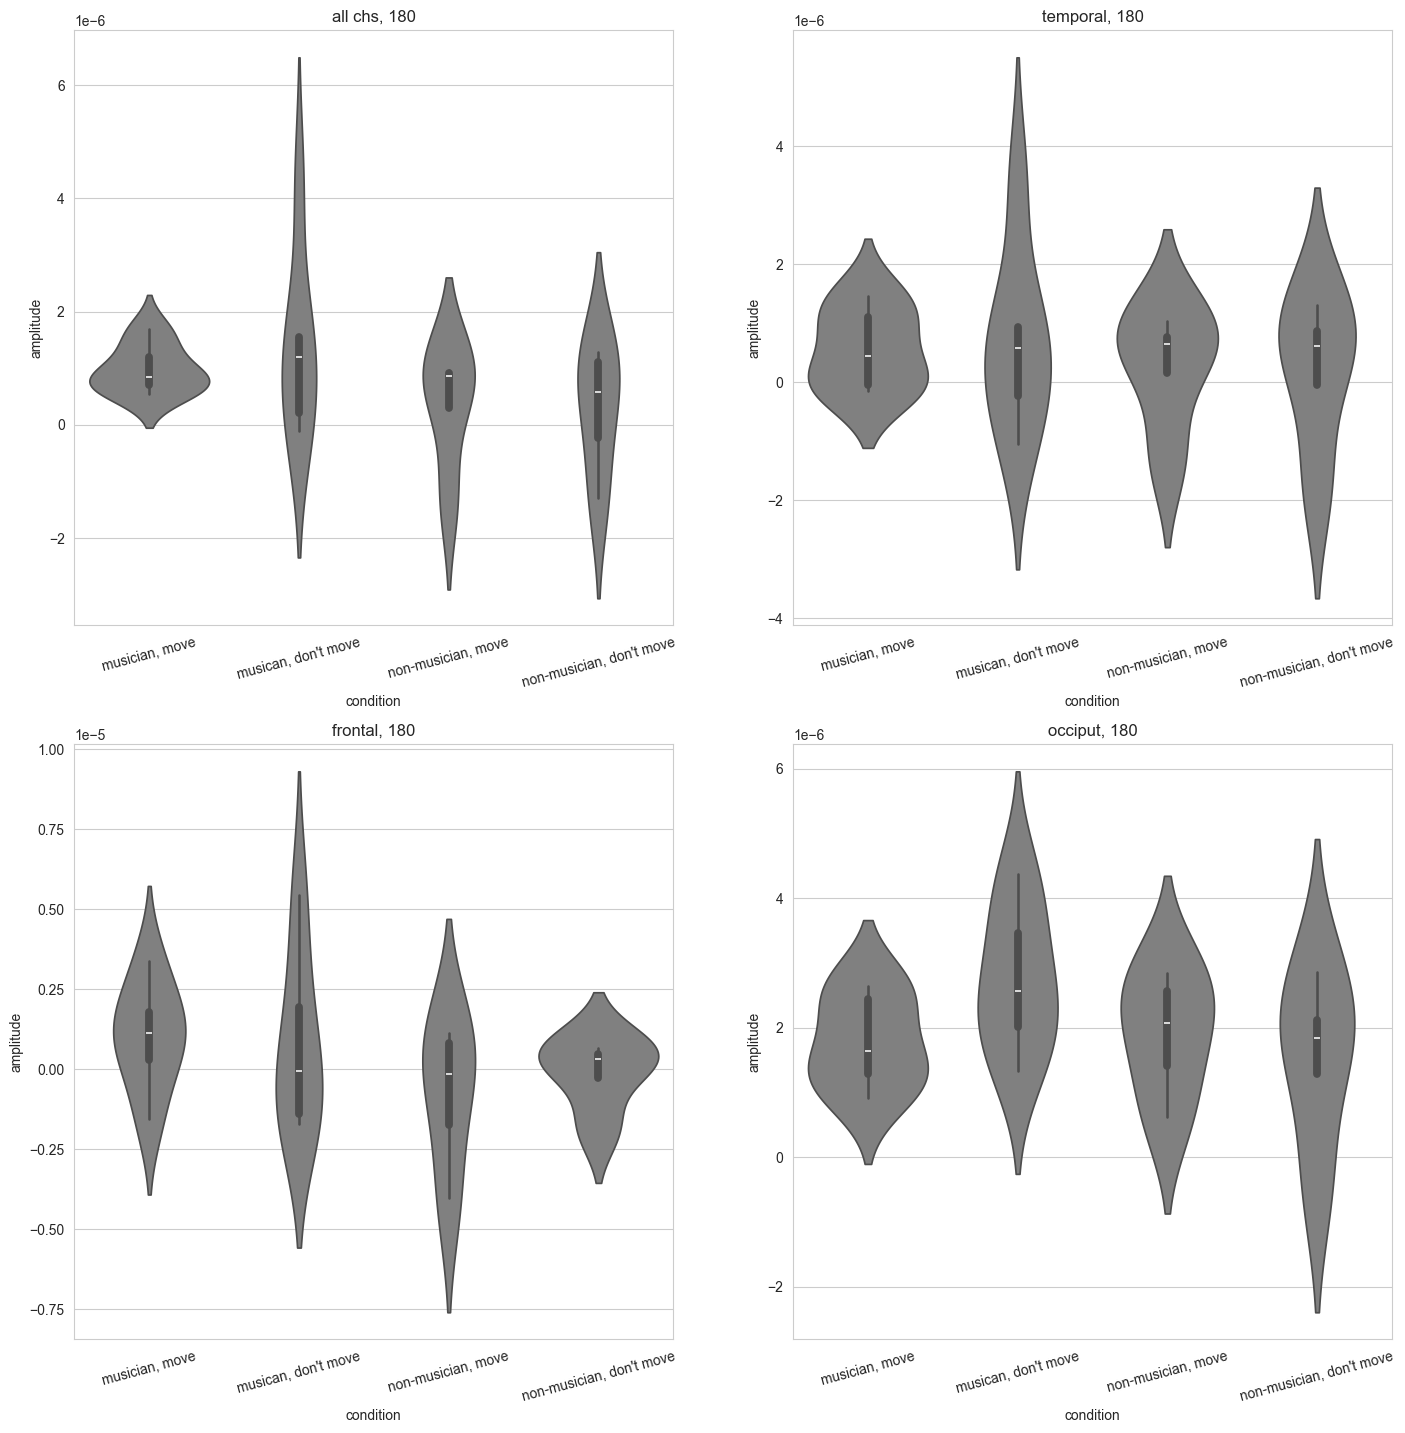

In [5]:
center = 180 * 1e-3

plt.figure(figsize=(17,17))
picks = None
name = "all chs, 180"
plt.subplot(2, 2, 1)
plot_vi(picks, center, name)

picks = picks_r+picks_l
name = "temporal, 180"
plt.subplot(2, 2, 2)
plot_vi(picks, center, name)

picks = picks_fr
name = "frontal, 180"
plt.subplot(2, 2, 3)
plot_vi(picks, center, name)

picks = picks_b
name = "occiput, 180"
plt.subplot(2, 2, 4)
plot_vi(picks, center, name)

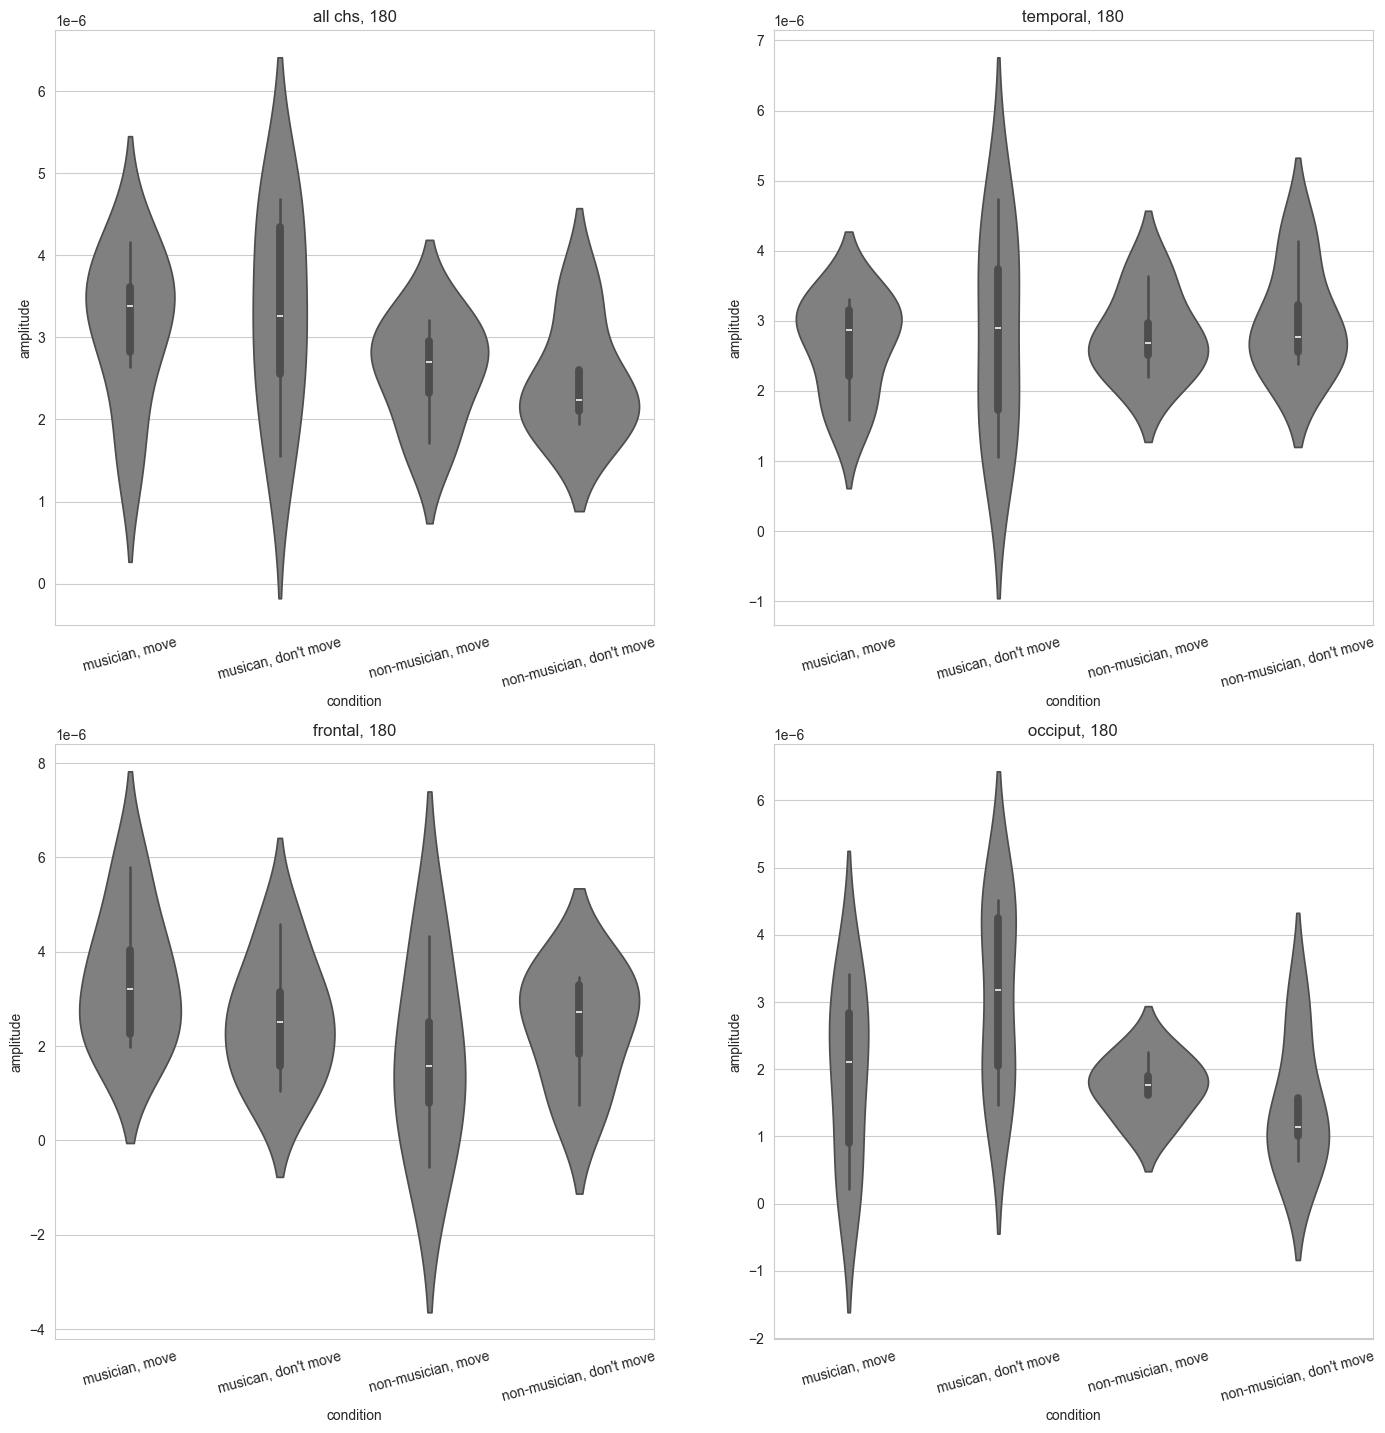

In [6]:
center = 300 * 1e-3

plt.figure(figsize=(17,17))
picks = None
name = "all chs, 180"
plt.subplot(2, 2, 1)
plot_vi(picks, center, name)

picks = picks_r+picks_l
name = "temporal, 180"
plt.subplot(2, 2, 2)
plot_vi(picks, center, name)

picks = picks_fr
name = "frontal, 180"
plt.subplot(2, 2, 3)
plot_vi(picks, center, name)

picks = picks_b
name = "occiput, 180"
plt.subplot(2, 2, 4)
plot_vi(picks, center, name)